In [1]:
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

with open('./demo_data/heatmap_sample_data.pkl', 'rb') as f:
    centroids = pickle.load(f)

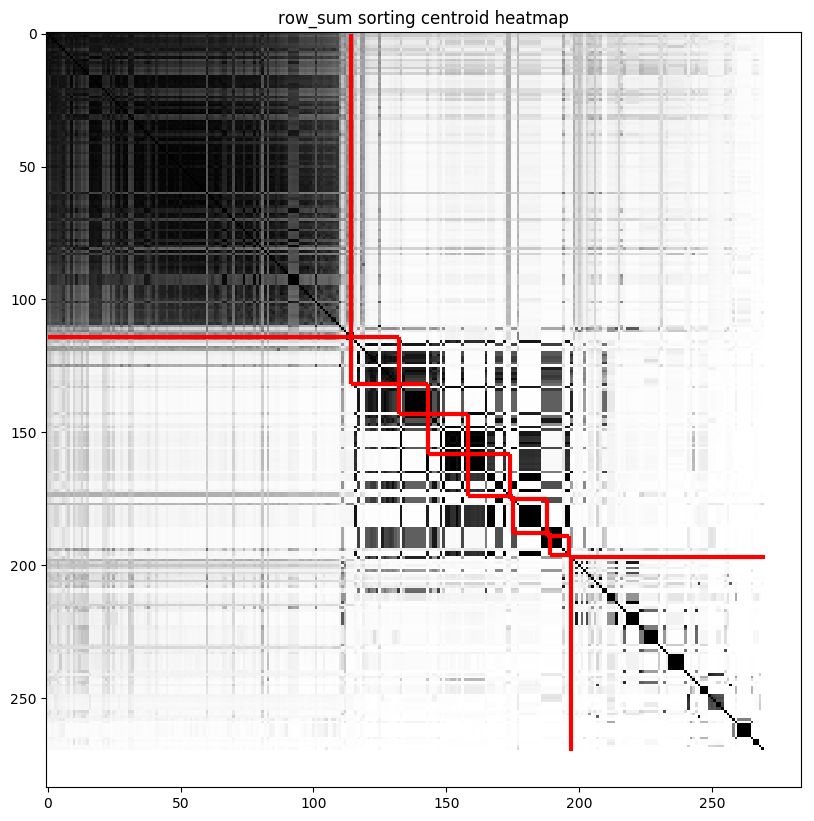

In [2]:
from clustervis import visualize_heatmap

figure = visualize_heatmap(centroids,
                           sort='row_sum',
                           segmentor='reverse_band',
                           dpi=100,
                           figsize=(10,10),
                           title='row_sum sorting centroid heatmap',
                           filter_width = int(centroids.shape[0]*0.5),
                           band_width = 10
                          )

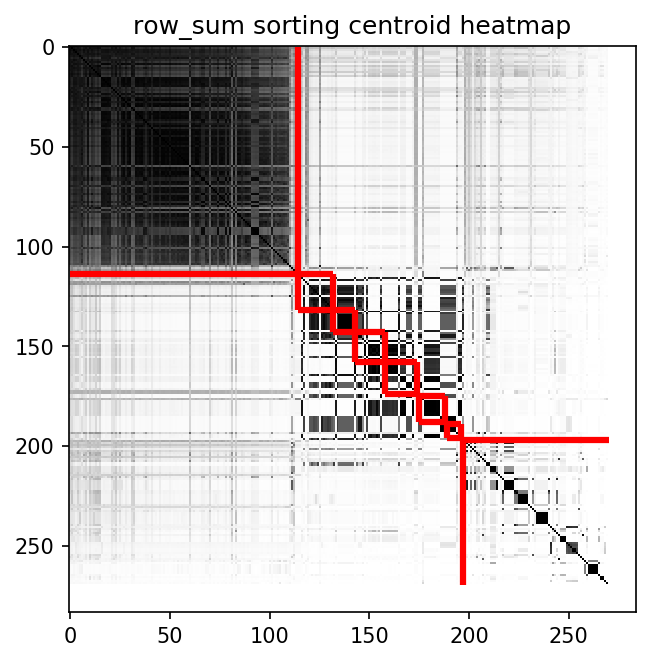

In [3]:
from clustervis import visualize_heatmap

figure = visualize_heatmap(centroids,
                           sort='row_sum',
                           segmentor='reverse_band',
                           dpi=150,
                           figsize=(5,5),
                           title='row_sum sorting centroid heatmap',
                           filter_width = int(centroids.shape[0]*0.5),
                           band_width = 10
                          )

In [4]:
figure.savefig('./demo_data/centroid_heatmap.png', dpi=100)

![centroid_heatmap](demo_data/centroid_heatmap.png)

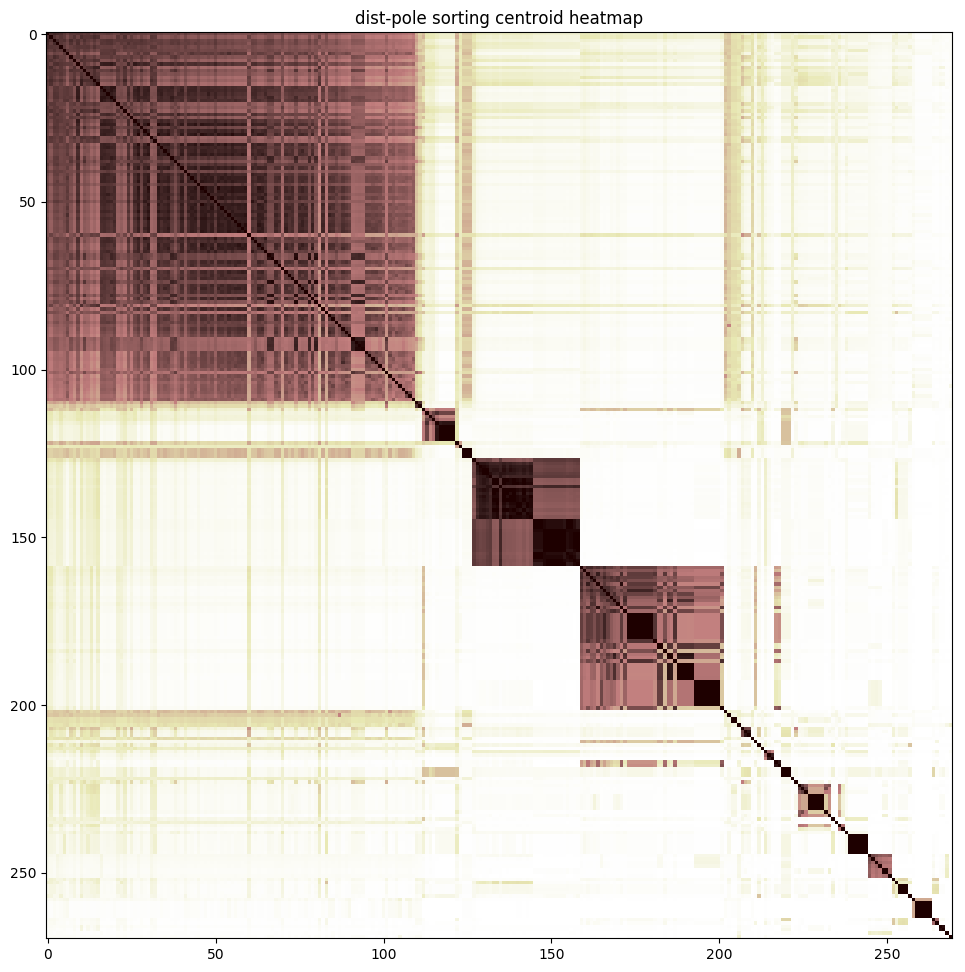

In [5]:
figure = visualize_heatmap(centroids,
                           sort='dist_pole',
                           dpi=100,
                           figsize=(12,12),
                           title='dist-pole sorting centroid heatmap',
                           dist_pole_max_dist = 0.5,
                           cmap = 'pink'
                          )

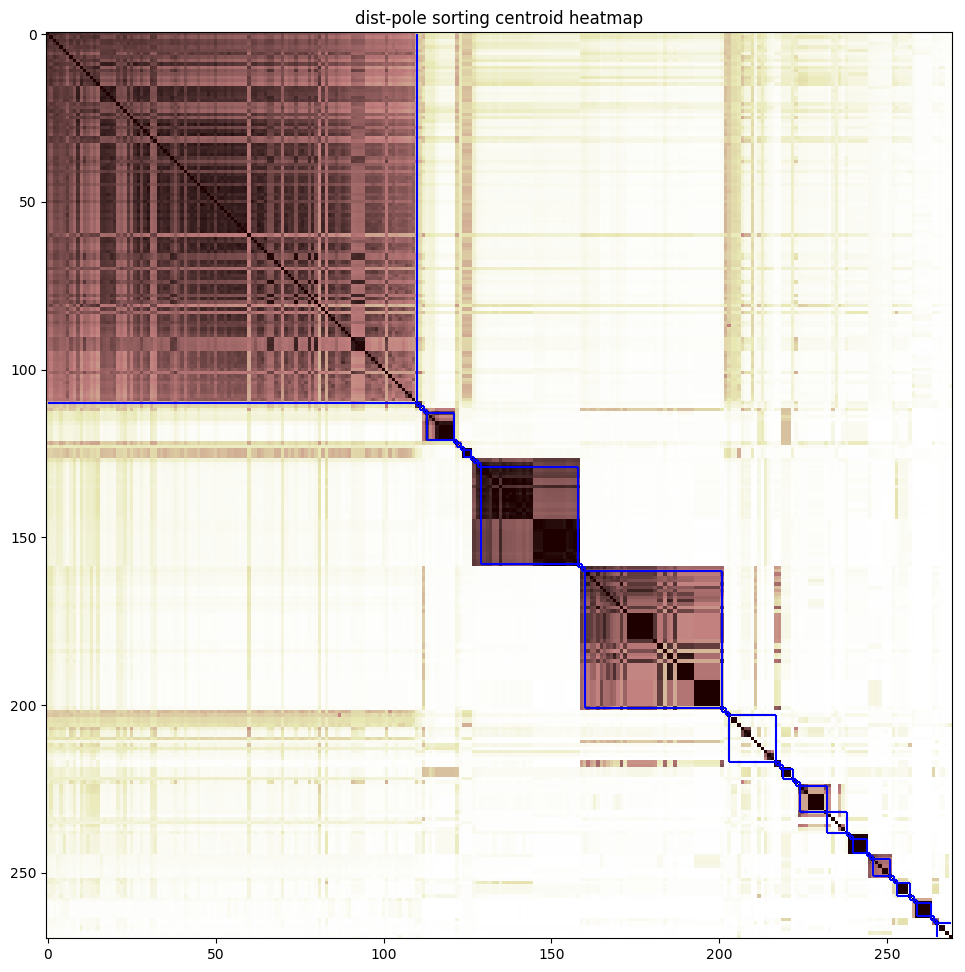

In [7]:
figure = visualize_heatmap(centroids,
                           sort='dist_pole',
                           dpi=100,
                           figsize=(12,12),
                           title='dist-pole sorting centroid heatmap',
                           dist_pole_max_dist = 0.5,
                           cmap = 'pink',
                           segmentor='gaussian_filter',
                           filter_size=5,
                           threshold=0.2,
                           line_width=1.5,
                           line_color='blue'
                          )